In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
import math

In [3]:
# Image path
img_path = 'images/sudoku.png'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

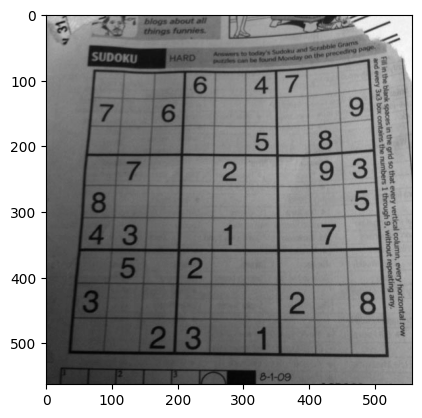

In [4]:
plt.imshow(img, cmap='gray')
plt.show()

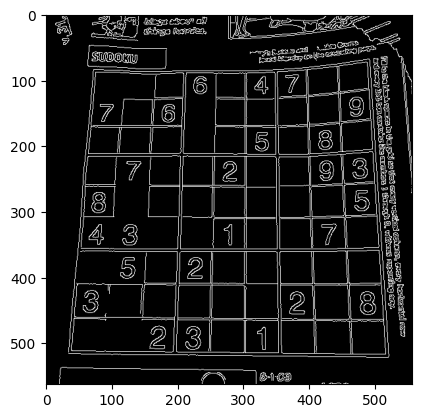

In [5]:
# We run the Canny model over the image
canny = cv.Canny(img, 50, 200, None, 3)
plt.imshow(canny, cmap='gray')
plt.show()

In [6]:
# We run the function HoughLines. this function returns a list of lines in way of
# Parametric equations
lines = cv.HoughLines(canny, 1, np.pi / 180, 145)

In [7]:
# We transform the original (in grayscale) to a color image in the way of
# the model can draw the lines that found and show the color instead of black
img_rgb = cv.cvtColor(img, cv.COLOR_GRAY2BGR)

In [8]:
def draw_lines(img_rgb, lines):
    # We iter for all the lines founded and draw it into the image.
    for i in range(0, len(lines)):
        # Get the parameters rho and theta
        rho = lines[i][0][0]
        theta = lines[i][0][1]

        # Calculate the values of a and b, that works to calculate the points
        # in the line equation
        a = math.cos(theta)
        b = math.sin(theta)

        # with x0 and y0 we had completed the equation
        x0 = a*rho
        y0 = b*rho

        # we calculate two points whatever who are them according to the equation
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))

        # We use a function cv.line() to draw the segment who pass through pt1 and pt2
        # over our image in violet color
        cv.line(img_rgb, pt1, pt2, (255,0,255), 3, cv.LINE_AA)
    return img_rgb


In [9]:
img_rgb = draw_lines(img_rgb, lines)

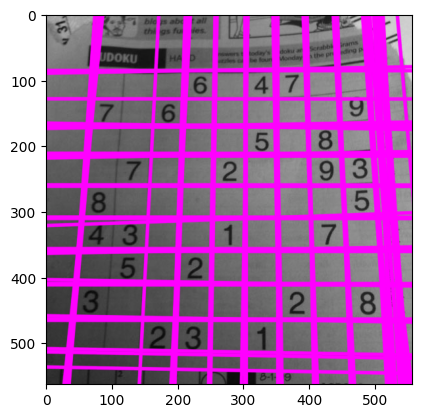

In [10]:
plt.imshow(img_rgb)
plt.show()

# Checking other parameters

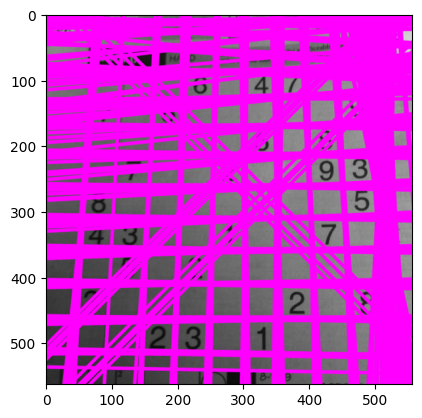

In [11]:
lines1 = cv.HoughLines(canny, 1, np.pi / 180, 105)
img_rgb1 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_rgb1 = draw_lines(img_rgb1, lines1)
plt.imshow(img_rgb1)
plt.show()

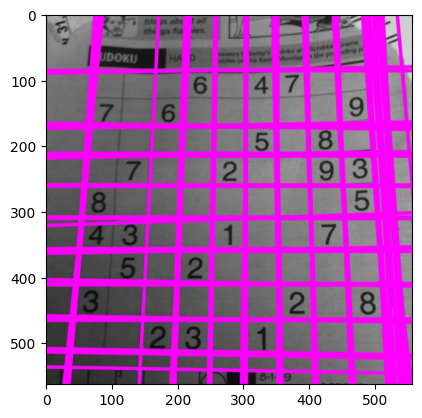

In [12]:
lines2 = cv.HoughLines(canny, 1, np.pi / 180, 150)
img_rgb2 = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_rgb2 = draw_lines(img_rgb2, lines2)
plt.imshow(img_rgb2)
plt.show()

In [13]:
# Circle images path
logo_img_path = "images/opencv-logo.png"

# Read the image in grayscale
img_c = cv.imread(logo_img_path, 0)

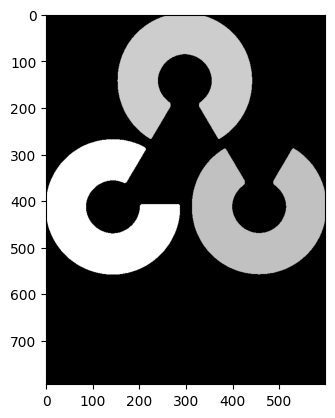

In [14]:
# Soft the image with a "median" filter 
img_c = cv.medianBlur(img_c,5)
plt.imshow(img_c, cmap='gray')
plt.show()

In [30]:
# we run the HoughCircles from opencv over the images in grayscale
circles = cv.HoughCircles(img_c, cv.HOUGH_GRADIENT, 1,20,
                          param1=50, param2=30, minRadius=0, maxRadius=0)
# round the result
circles = np.uint16(np.around(circles))

In [31]:
# We changed the images from grayscale to color, so with this the cv can draw
# the circles into the image
cimg = cv.cvtColor(img_c, cv.COLOR_GRAY2BGR)

In [32]:
def draw_circles(cimg, circles):
    for i in circles[0, :]:
        # draw the green circle
        cv.circle(cimg, (i[0], i[1]), i[2], (0,255,0),6)

        # Draw a central violet dot in the middle of the circle
        cv.circle(cimg, (i[0], i[1]), 2, (255,0,255),5)
    return cimg


In [33]:
cimg = draw_circles(cimg, circles)

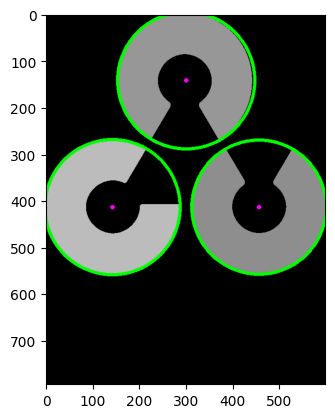

In [34]:
# show the image
plt.imshow(cimg)
plt.show()